# War fatalities in Russia in 2022 estimated via excess male mortality
## External deaths by cause

In [1]:
%matplotlib inline

import numpy as np
import pylab as plt
import pandas as pd

from sklearn.linear_model import LinearRegression

plt.style.use("mpl_style.txt")

In [4]:
df_causes = pd.read_excel('../deaths-by-cause-region-year/fedstat31620.xls')

df_causes

,"Число умерших по основным классам и отдельным причинам смерти за год (человек, значение показателя за год)",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,1990,NaN,NaN,1991,NaN,NaN,1992,NaN,...,NaN,2020,NaN,NaN,2021,NaN,NaN,2022,NaN,NaN
2,NaN,NaN,все население,городское население,сельское население,все население,городское население,сельское население,все население,городское население,...,сельское население,все население,городское население,сельское население,все население,городское население,сельское население,все население,городское население,сельское население
3,Болезни органов дыхания,Российская Федерация,87970,50247,37723,82817,47906,34911,86041,50424,...,19812,96539,66692,29847,114727,78278,36449,81504,55073,26431
4,Болезни органов дыхания,Центральный федеральный округ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3987,21831,16564,5267,25288,18647,6641,19511,13985,5526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1925,Цереброваскулярные болезни,Магаданская область,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11,212,196,16,263,248,15,213,203,10
1926,Цереброваскулярные болезни,Сахалинская область,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,122,599,461,138,587,472,115,593,471,122
1927,Цереброваскулярные болезни,Еврейская автономная область,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,109,387,257,130,304,215,89,295,188,107
1928,Цереброваскулярные болезни,Чукотский автономный округ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,17,43,32,11,31,20,11,28,16,12


In [5]:
external = df_causes.values[363][26::3]  / 1000
traffic  = df_causes.values[580][26::3]  / 1000
suicides = df_causes.values[1357][26::3] / 1000
alcohol  = df_causes.values[1477][26::3] / 1000
murders  = df_causes.values[1702][26::3] / 1000

rest = external - suicides - alcohol - traffic - murders
 
years = np.arange(2000, 2023)

Excess in rest: 29885
Excess in all: 41439


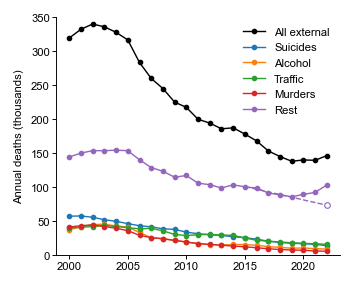

In [6]:
fig = plt.figure(figsize=(2.5, 2))

plt.plot(years, external, 'k.-', label='All external')
plt.plot(years, suicides, '.-', label='Suicides')
plt.plot(years, alcohol, '.-', label='Alcohol')
plt.plot(years, traffic, '.-', label='Traffic')
plt.plot(years, murders, '.-', label='Murders')
restline = plt.plot(years, rest, '.-', label='Rest')

LinReg = LinearRegression()
LinReg.fit(years[-8:-3].reshape(-1,1), rest[-8:-3].reshape(-1,1))
yhat = LinReg.predict(years[-8:].reshape(-1,1)).flatten()
plt.plot(years[-8:], yhat, '--', zorder=0, color=restline[0].get_color())
plt.plot(years[-1], yhat[-1], 'o', color='w', markeredgecolor=restline[0].get_color(),
            markersize=3, markeredgewidth=.6)

print(f'Excess in rest: {(rest[-1] - yhat[-1]) * 1000:.0f}')

LinReg.fit(years[-8:-3].reshape(-1,1), external[-8:-3].reshape(-1,1))
yhat = LinReg.predict(years[-8:].reshape(-1,1)).flatten()

print(f'Excess in all: {(external[-1] - yhat[-1]) * 1000:.0f}')

plt.ylabel('Annual deaths (thousands)')
plt.legend()
plt.ylim([0, 350])

plt.savefig('figures/external.pdf')
plt.savefig('figures/external.png')